In [29]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import h2o
from h2o.automl import H2OAutoML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('water_quality.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

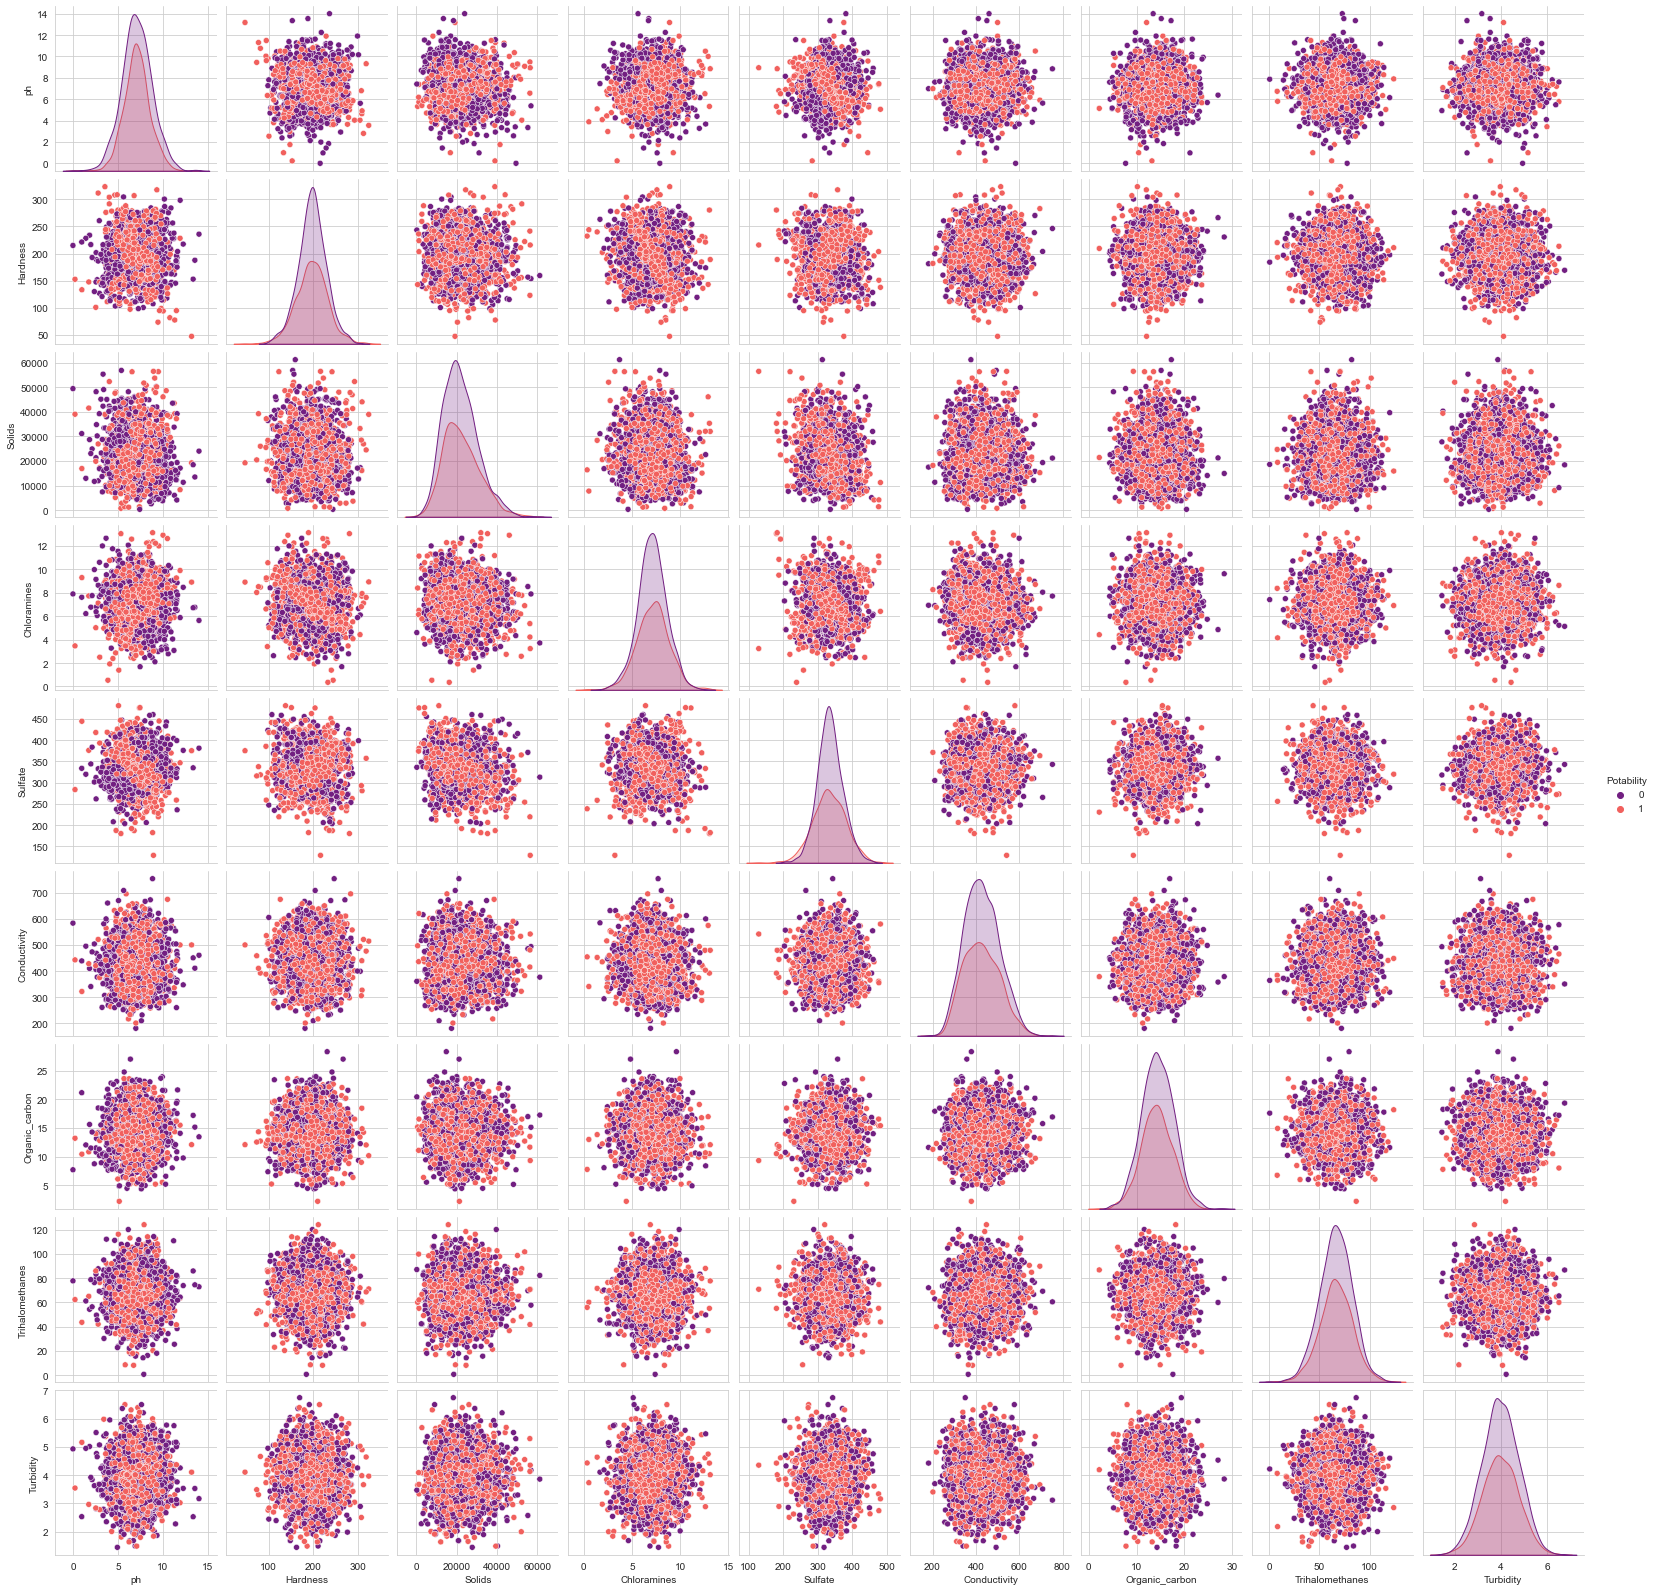

In [8]:
data = df.copy()
data.drop('Potability',axis=1)
sns.pairplot(data,hue='Potability',palette='magma')

<AxesSubplot:ylabel='Potability'>

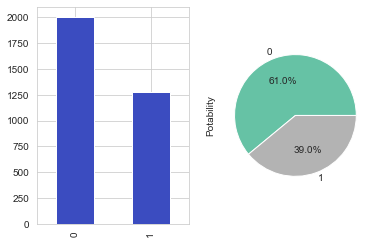

In [9]:
fig,ax = plt.subplots(1,2)
df['Potability'].value_counts().plot(kind='bar',cmap='coolwarm',ax=ax[0])
df['Potability'].value_counts().plot(kind='pie',autopct='%.1f%%',cmap='Set2',ax=ax[1])

<AxesSubplot:xlabel='ph', ylabel='Density'>

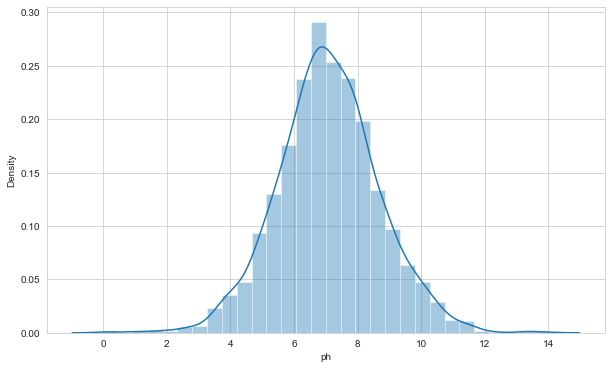

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df['ph'],bins=30)

<AxesSubplot:>

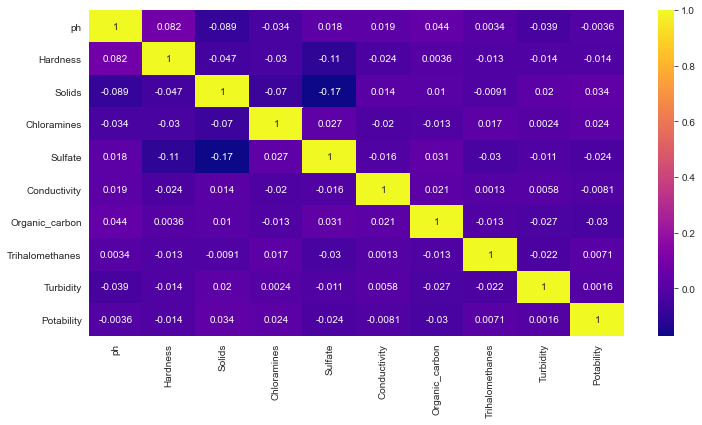

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

<AxesSubplot:>

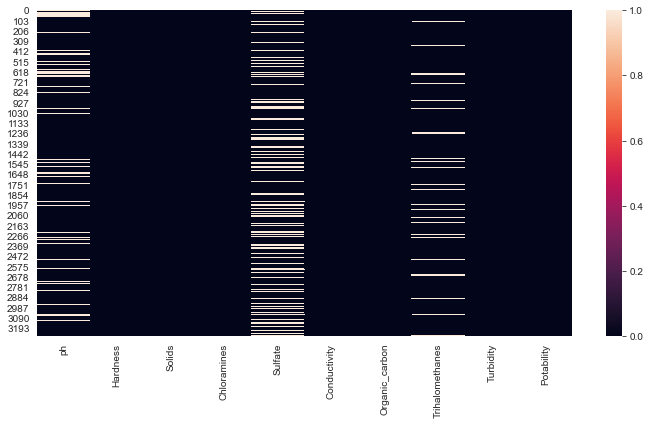

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [13]:
print(str(100 * (df['Sulfate'].isnull().sum()/len(df['Sulfate']))) + "% of the sulfate data is missing")

23.84004884004884% of the sulfate data is missing


In [14]:
df['Sulfate'].fillna(df['Sulfate'].mean(),inplace=True)

<AxesSubplot:>

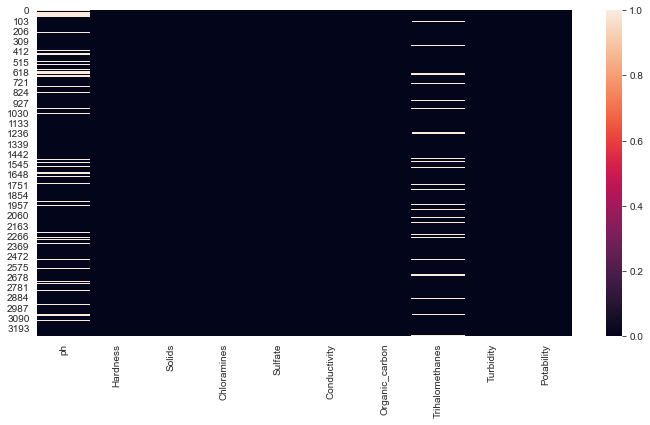

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [16]:
print(str(100 * (df['ph'].isnull().sum()/len(df['ph']))) + "% of the ph data is missing")

14.987789987789988% of the ph data is missing


In [17]:
print(str(100 * (df['Trihalomethanes'].isnull().sum()/len(df['Trihalomethanes']))) + "% of the trihalomethanes data is missing")

4.945054945054945% of the trihalomethanes data is missing


In [18]:
df['ph'].fillna(df['ph'].mean(),inplace=True)

<AxesSubplot:>

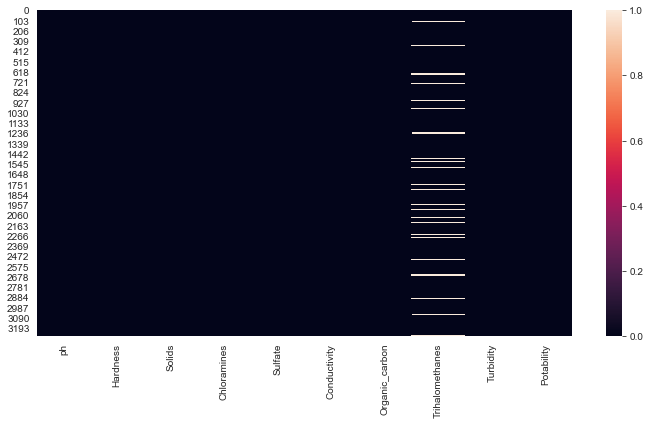

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [20]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

In [21]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [22]:
X = df.drop('Potability',axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuary of Logistic Regression: 62.27106227106227


Confusion Matrix of Logistic Regression:


Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       510
           1       0.00      0.00      0.00       309

    accuracy                           0.62       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.62      0.48       819



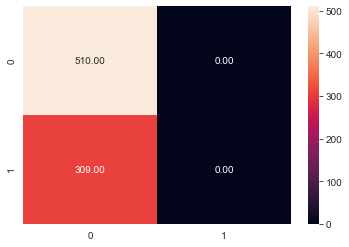

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

print("Accuary of Logistic Regression: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Logistic Regression:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Logistic Regression:")
print(classification_report(y_test,predictions))

acc_lg = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Support Vector Machine: 69.59706959706959


Confusion Matrix of Support Vector Machine:


Classification Report of Support Vector Machine:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       510
           1       0.71      0.33      0.45       309

    accuracy                           0.70       819
   macro avg       0.70      0.62      0.62       819
weighted avg       0.70      0.70      0.66       819



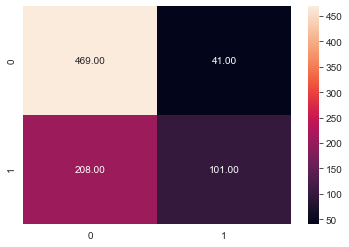

In [24]:
svc = SVC()
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

print("Accuary of Support Vector Machine: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Support Vector Machine:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Support Vector Machine:")
print(classification_report(y_test,predictions))

acc_lg = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Random Forest: 68.00976800976801


Confusion Matrix of Random Forest:


Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       510
           1       0.64      0.34      0.44       309

    accuracy                           0.68       819
   macro avg       0.67      0.61      0.61       819
weighted avg       0.67      0.68      0.65       819



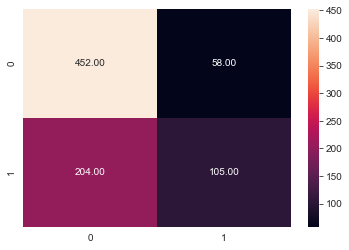

In [25]:
rf = RandomForestClassifier(n_estimators=160)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

print("Accuary of Random Forest: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Random Forest:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Random Forest:")
print(classification_report(y_test,predictions))

acc_rf = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of K Nearest Neighbors: 62.75946275946276




Classification Report of K Nearest Neigbors:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       510
           1       0.51      0.40      0.45       309

    accuracy                           0.63       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.63      0.62       819



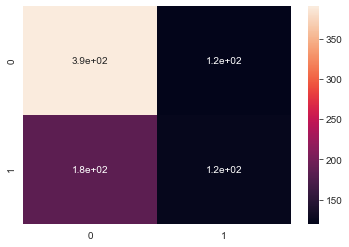

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print("Accuary of K Nearest Neighbors: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of K Nearest Neigbors:")
print(classification_report(y_test,predictions))

acc_knn = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Decision Tree: 59.21855921855922


Confusion Matrix of Decision Tree:


Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       510
           1       0.46      0.51      0.49       309

    accuracy                           0.59       819
   macro avg       0.57      0.58      0.57       819
weighted avg       0.60      0.59      0.60       819



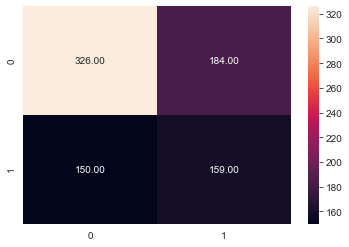

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)

print("Accuary of Decision Tree: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Decision Tree:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Decision Tree:")
print(classification_report(y_test,predictions))

acc_dt = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Gradient Boosting: 66.30036630036629


Confusion Matrix of Gradient Boosting:


Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.67      0.92      0.77       510
           1       0.65      0.24      0.35       309

    accuracy                           0.66       819
   macro avg       0.66      0.58      0.56       819
weighted avg       0.66      0.66      0.61       819



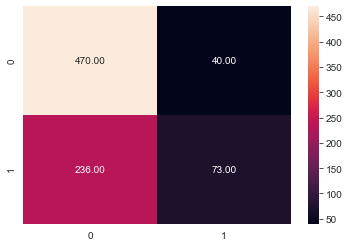

In [28]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
predictions = gb.predict(X_test)

print("Accuary of Gradient Boosting: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Gradient Boosting:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Gradient Boosting:")
print(classification_report(y_test,predictions))

acc_gb = round(accuracy_score(y_test, predictions) * 100, 2)

In [30]:
h2o.init(max_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20 LTS; OpenJDK Runtime Environment Corretto-11.0.11.9.1 (build 11.0.11+9-LTS); OpenJDK 64-Bit Server VM Corretto-11.0.11.9.1 (build 11.0.11+9-LTS, mixed mode)
  Starting server from /Users/lakshaysoin/opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/6j/25f55zz11lq3cjb9v_4v6m280000gn/T/tmpwrva40na
  JVM stdout: /var/folders/6j/25f55zz11lq3cjb9v_4v6m280000gn/T/tmpwrva40na/h2o_lakshaysoin_started_from_python.out
  JVM stderr: /var/folders/6j/25f55zz11lq3cjb9v_4v6m280000gn/T/tmpwrva40na/h2o_lakshaysoin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_lakshaysoin_67aznx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [31]:
h2o_df = h2o.H2OFrame(df)
h2o_df['Potability'] = h2o_df['Potability'].asfactor()

X=h2o_df.columns[0:-1]
y=h2o_df.columns[-1]

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
train, test=h2o_df.split_frame(ratios=[.7])

aml = H2OAutoML(balance_classes=True)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████ (cancelled)  99%


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_a9e0a790eda4f3189cd6d71621884b38> was cancelled by the user.

In [ ]:
pred = aml.leader.predict(test)
y_val = h2o.as_list(test['Potability'], use_pandas=True)
pred_val = h2o.as_list(pred['predict'], use_pandas=True)

print("Classification Report of Auto ML:")
print(classification_report(y_val,pred_val))
print('\n')
sns.heatmap(confusionmatrix(y_val,pred_val),annot=True,fmt='.2f')